# Tarea - Ajuste de curvas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [30]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

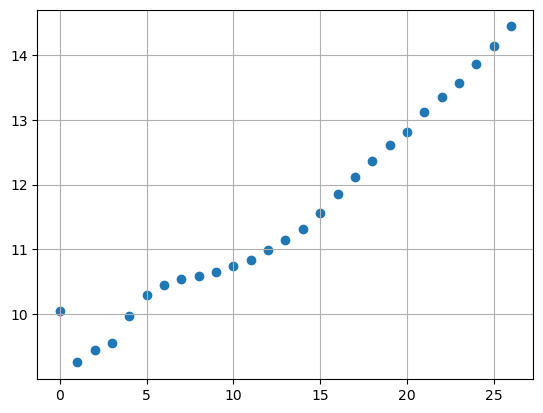

In [45]:
# y =  b1x + b0   transformarlo a  y = b3x**3 + b2x**2 + b1x + b0

import matplotlib.pyplot as plt
%matplotlib inline

#costos = y
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

m=27  # Son 27 datos iniciando que 0 es 2014 y 27 es 2040

#años = x
x=np.linspace(0,26,m)


plt.figure()
plt.scatter(x,y)
plt.grid()

In [46]:
import scipy.optimize as opt

def funcion_de_costo(beta,X,y):
    m,n = X.shape
    beta = np.reshape(beta,[n,1])
    y_pred = X @ beta
    error = y_pred - y
    return(error.T @ error)[0][0]

In [54]:
import scipy.optimize as opt

# y = b0 + b1x
beta1 = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X1 = np.hstack((ones, x_factor))
y_vector = np.reshape(y, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta1, args=(X1, y_vector))

# y = b0 + b1x + b2x**2 
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack((ones, x_factor, x2_factor))
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))

# y = b0 + b1x + b2x**2 + b3x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack((ones, x_factor, x2_factor, x3_factor))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

In [53]:
sol1.x

array([9.11567637, 0.18667055])

In [55]:
sol2.x

array([9.59131559e+00, 7.25183267e-02, 4.39045859e-03])

In [56]:
sol3.x

array([9.56532349e+00, 8.53353624e-02, 3.14853085e-03, 3.16672565e-05])

In [62]:
def f1(x):
    return 9.11567637 + 0.18667055*x

def f2(x):
    return 9.59131559e+00 + 7.25183267e-02*x + 4.39045859e-03*x**2

def f3(x):
    return 9.56532349e+00 + 8.53353624e-02*x + 3.14853085e-03*x**2 + 3.16672565e-05*x**3

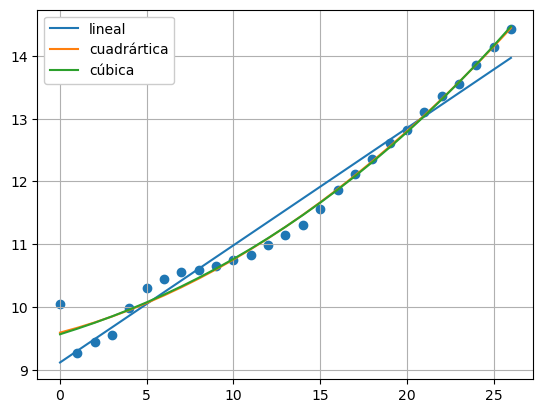

In [63]:
plt.figure()
plt.scatter(x,y)
plt.grid()
plt.plot(x, f1(x), label ="lineal")
plt.plot(x, f2(x), label ="cuadrártica")
plt.plot(x, f3(x), label ="cúbica")
plt.legend(framealpha=1, frameon=True)

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [4]:
import pandas as pd
data = pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [85]:
m=66
x=np.linspace(1950,2015,m)
y = np.array(data['Poblacion'])

In [86]:
def funcion_de_costo(beta,X,y):
    m,n = X.shape
    beta = np.reshape(beta,[n,1])
    y_pred = X @ beta
    error = y_pred - y
    return(error.T @ error)[0][0]

In [87]:
# y = b0 + b1x
beta1 = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X1 = np.hstack((ones, x_factor))
y_vector = np.reshape(y, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta1, args=(X1, y_vector))

# y = b0 + b1x + b2x**2 
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack((ones, x_factor, x2_factor))
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))

# y = b0 + b1x + b2x**2 + b3x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack((ones, x_factor, x2_factor, x3_factor))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

In [88]:
sol1.x

array([-2.98660504e+06,  1.54397084e+03])

In [89]:
sol2.x

array([-1.29107853e+06, -1.62468061e+02,  4.29321274e-01])

In [90]:
sol3.x

array([ 2.96139466e-01,  1.17853813e-01, -4.75964189e-01,  2.49580797e-04])

In [93]:
def f1(x):
    return -2.98660504e+06 + 1.54397084e+03*x

def f2(x):
    return -1.29107853e+06 + -1.62468061e+02*x + 4.29321274e-01*x**2

def f3(x):
    return    2.96139466e-01 + 1.17853813e-01*x + -4.75964189e-01*x**2 +  2.49580797e-04*x**3

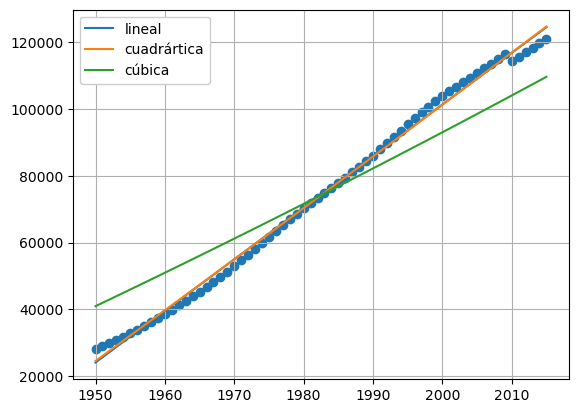

In [94]:
plt.figure()
plt.scatter(x,y)
plt.grid()
plt.plot(x, f1(x), label ="lineal")
plt.plot(x, f2(x), label ="cuadrártica")
plt.plot(x, f3(x), label ="cúbica")
plt.legend(framealpha=1, frameon=True)